# **Detecting potential customer for BlueSky**


##**Train Data**

In [74]:
#Importance necessary libraries

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

In [75]:
#load the datasets
train_data = pd.read_csv("/content/CustomerPotential_traindata1.csv")

In [76]:
cus_b01 = pd.read_csv("/content/Customer Behaviour_01.csv")

In [77]:
cus_b02 = pd.read_csv("/content/Customer Behaviour_02.csv")

Here we have taken all the 3 datasets which include the traninig data and two customer behaviour datasets inorder to train the model and to obtain various insights from the data.

In [78]:
train_data.head()

Unnamed: 0    Peopleid  Target
0       38270  ppl_190785       0
1       30017  ppl_171219       1
2       31211  ppl_174140       0
3       61411  ppl_245388       1
4        1341  ppl_103150       1

In [79]:
cus_b01.head()

people_id   activity_id        date activity_category char_1 char_2 char_3  \
0   ppl_100  act2_1734928  26/08/2023            type 4    NaN    NaN    NaN   
1   ppl_100  act2_2434093  27/09/2022            type 2    NaN    NaN    NaN   
2   ppl_100  act2_3404049  27/09/2022            type 2    NaN    NaN    NaN   
3   ppl_100  act2_3651215  04/08/2023            type 2    NaN    NaN    NaN   
4   ppl_100  act2_4109017  26/08/2023            type 2    NaN    NaN    NaN   

  char_4 char_5 char_6 char_7 char_8 char_9  char_10  
0    NaN    NaN    NaN    NaN    NaN    NaN  type 76  
1    NaN    NaN    NaN    NaN    NaN    NaN   type 1  
2    NaN    NaN    NaN    NaN    NaN    NaN   type 1  
3    NaN    NaN    NaN    NaN    NaN    NaN   type 1  
4    NaN    NaN    NaN    NaN    NaN    NaN   type 1

In [80]:
cus_b02.head()

people_id  char_1      group_1  char_2        date   char_3   char_4  \
0     ppl_100  type 2  group 17304  type 2  2021-06-29   type 5   type 5   
1  ppl_100002  type 2   group 8688  type 3  2021-01-06  type 28   type 9   
2  ppl_100003  type 2  group 33592  type 3  2022-06-10   type 4   type 8   
3  ppl_100004  type 2  group 22593  type 3  2022-07-20  type 40  type 25   
4  ppl_100006  type 2   group 6534  type 3  2022-07-27  type 40  type 25   

   char_5  char_6   char_7  ... char_29 char_30  char_31  char_32  char_33  \
0  type 5  type 3  type 11  ...   False    True     True    False    False   
1  type 5  type 3  type 11  ...   False    True     True     True     True   
2  type 5  type 2   type 5  ...   False   False     True     True     True   
3  type 9  type 4  type 16  ...    True    True     True     True     True   
4  type 9  type 3   type 8  ...   False   False     True    False    False   

   char_34  char_35  char_36  char_37  char_38  
0     True     True     True    False       36  
1     True     True     True    False       76  
2     True    False     True     True       99  
3     True     True     True     True       76  
4    False     True     True    False       84  

[5 rows x 41 columns]

In [81]:
train_data.shape

(60061, 3)

In [82]:
cus_b01.shape

(1048575, 14)

In [83]:
cus_b02.shape

(189118, 41)

**Merge all the datasets**

In [84]:
#Before merging change the coloumn names into similar column names
train_data.rename(columns={'Peopleid' : 'people_id'}, inplace=True)

# Merge the datasets together on a common column
merged_df = pd.merge(train_data, cus_b01, on='people_id')
train_df = pd.merge(merged_df, cus_b02, on='people_id')


In [85]:
train_df.head(10)

Unnamed: 0   people_id  Target  activity_id      date_x activity_category  \
0       38270  ppl_190785       0  act1_115792  03/08/2022            type 1   
1       38270  ppl_190785       0  act1_169544  29/06/2023            type 1   
2       38270  ppl_190785       0   act1_17509  31/08/2023            type 1   
3       38270  ppl_190785       0  act1_192861  14/03/2023            type 1   
4       38270  ppl_190785       0  act1_196299  16/11/2022            type 1   
5       38270  ppl_190785       0  act1_213981  25/02/2023            type 1   
6       38270  ppl_190785       0  act1_220485  27/12/2022            type 1   
7       38270  ppl_190785       0  act1_238986  08/12/2022            type 1   
8       38270  ppl_190785       0  act1_268700  27/01/2023            type 1   
9       38270  ppl_190785       0  act1_295875  03/08/2023            type 1   

  char_1_x char_2_x char_3_x char_4_x  ... char_29 char_30 char_31 char_32  \
0   type 5  type 10   type 5   type 1  ...   False   False   False    True   
1   type 5   type 2   type 6   type 3  ...   False   False   False    True   
2   type 5   type 2   type 4   type 3  ...   False   False   False    True   
3   type 5   type 2   type 6   type 3  ...   False   False   False    True   
4   type 5   type 2   type 1   type 3  ...   False   False   False    True   
5   type 5   type 5   type 6   type 3  ...   False   False   False    True   
6   type 5   type 2   type 6   type 3  ...   False   False   False    True   
7   type 5   type 2   type 6   type 3  ...   False   False   False    True   
8   type 5   type 2   type 4   type 3  ...   False   False   False    True   
9   type 3   type 2   type 1   type 3  ...   False   False   False    True   

  char_33 char_34 char_35 char_36 char_37 char_38  
0   False    True    True    True    True      31  
1   False    True    True    True    True      31  
2   False    True    True    True    True      31  
3   False    True    True    True    True      31  
4   False    True    True    True    True      31  
5   False    True    True    True    True      31  
6   False    True    True    True    True      31  
7   False    True    True    True    True      31  
8   False    True    True    True    True      31  
9   False    True    True    True    True      31  

[10 rows x 56 columns]

In [86]:
train_df.shape

(796163, 56)

**Checking for missing values**


In [87]:
#check for null values
train_df.isna().sum()

Unnamed: 0                0
people_id                 0
Target                    0
activity_id               0
date_x                    0
activity_category         0
char_1_x             733162
char_2_x             733162
char_3_x             733162
char_4_x             733162
char_5_x             733162
char_6_x             733162
char_7_x             733162
char_8_x             733162
char_9_x             733162
char_10_x             63001
char_1_y                  0
group_1                   0
char_2_y                  0
date_y                    0
char_3_y                  0
char_4_y                  0
char_5_y                  0
char_6_y                  0
char_7_y                  0
char_8_y                  0
char_9_y                  0
char_10_y                 0
char_11                   0
char_12                   0
char_13                   0
char_14                   0
char_15                   0
char_16                   0
char_17                   0
char_18             

In [88]:
# drop columns with all missing values
train_df = train_df.drop(columns=['char_1_x', 'char_2_x','char_3_x','char_4_x','char_5_x','char_6_y','char_7_x','char_8_y','char_9_x','char_10_x'])

In [89]:
train_df.shape

(796163, 46)

**Checking datatypes**

In [90]:
train_df.dtypes

Unnamed: 0            int64
people_id            object
Target                int64
activity_id          object
date_x               object
activity_category    object
char_6_x             object
char_8_x             object
char_1_y             object
group_1              object
char_2_y             object
date_y               object
char_3_y             object
char_4_y             object
char_5_y             object
char_7_y             object
char_9_y             object
char_10_y              bool
char_11                bool
char_12                bool
char_13                bool
char_14                bool
char_15                bool
char_16                bool
char_17                bool
char_18                bool
char_19                bool
char_20                bool
char_21                bool
char_22                bool
char_23                bool
char_24                bool
char_25                bool
char_26                bool
char_27                bool
char_28             

**Finding categorical and numerical columns**

In [91]:
# Find categorical columns
categorical_cols = train_df.select_dtypes(include=['object','bool']).columns.tolist()
print("\nCategorical Columns:")
print(categorical_cols)

# Find numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumerical Columns:")
print(numerical_cols)


Categorical Columns:
['people_id', 'activity_id', 'date_x', 'activity_category', 'char_6_x', 'char_8_x', 'char_1_y', 'group_1', 'char_2_y', 'date_y', 'char_3_y', 'char_4_y', 'char_5_y', 'char_7_y', 'char_9_y', 'char_10_y', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35', 'char_36', 'char_37']

Numerical Columns:
['Unnamed: 0', 'Target', 'char_38']


**Label Encoder**

LabelEncoder can be used to **normalize labels**. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [92]:
from sklearn.preprocessing import LabelEncoder
# Perform label encoding on categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))

# Check the encoded data
print(train_df.head())

   Unnamed: 0  people_id  Target  activity_id  date_x  activity_category  \
0       38270      30657       0         2638      33                  0   
1       38270      30657       0        11653     380                  0   
2       38270      30657       0        12611     408                  0   
3       38270      30657       0        15582     171                  0   
4       38270      30657       0        16163     206                  0   

   char_6_x  char_8_x  char_1_y  group_1  ...  char_29  char_30  char_31  \
0         1        16         1     2679  ...        0        0        0   
1         2        13         1     2679  ...        0        0        0   
2         3        13         1     2679  ...        0        0        0   
3         2        14         1     2679  ...        0        0        0   
4         3        13         1     2679  ...        0        0        0   

   char_32  char_33  char_34  char_35  char_36  char_37  char_38  
0        1        0

**Visualisation**

In [93]:
train_df.columns

Index(['Unnamed: 0', 'people_id', 'Target', 'activity_id', 'date_x',
       'activity_category', 'char_6_x', 'char_8_x', 'char_1_y', 'group_1',
       'char_2_y', 'date_y', 'char_3_y', 'char_4_y', 'char_5_y', 'char_7_y',
       'char_9_y', 'char_10_y', 'char_11', 'char_12', 'char_13', 'char_14',
       'char_15', 'char_16', 'char_17', 'char_18', 'char_19', 'char_20',
       'char_21', 'char_22', 'char_23', 'char_24', 'char_25', 'char_26',
       'char_27', 'char_28', 'char_29', 'char_30', 'char_31', 'char_32',
       'char_33', 'char_34', 'char_35', 'char_36', 'char_37', 'char_38'],
      dtype='object')

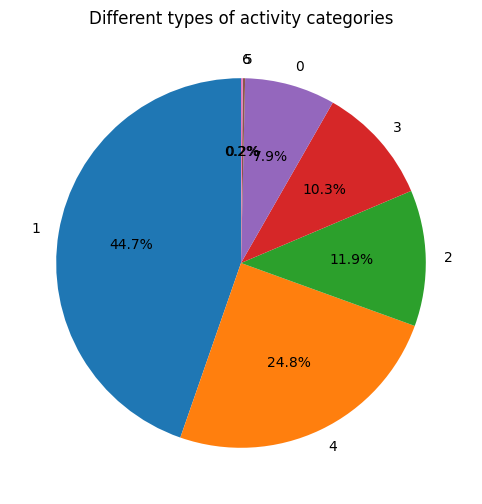

In [94]:
#plot a pie chart
num_claims = len(train_df)

# get the number of claims with each severity level
severity_counts = train_df['activity_category'].value_counts()

# create a pie chart of the claims by severity
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Different types of activity categories')

plt.show()

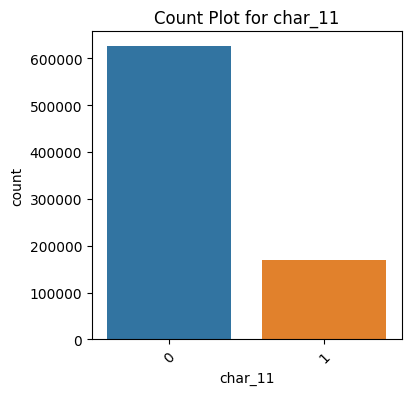

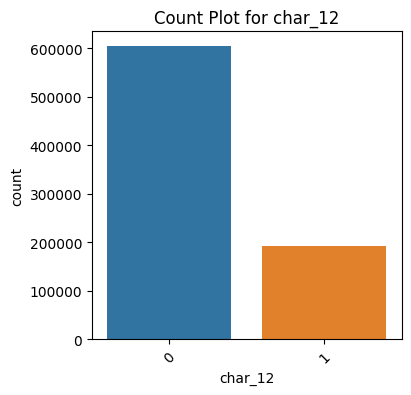

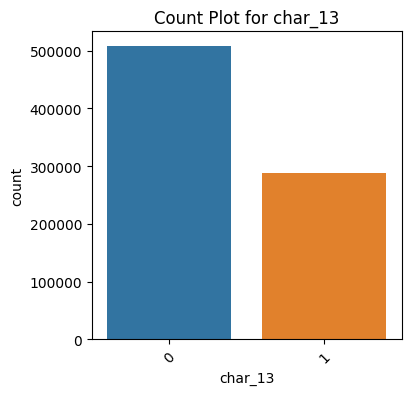

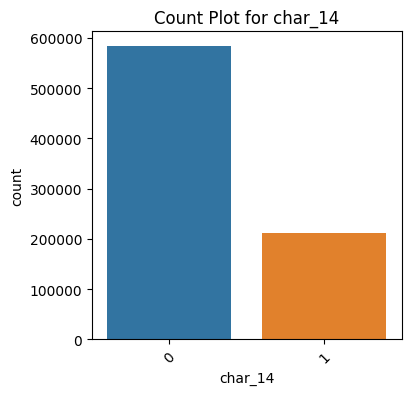

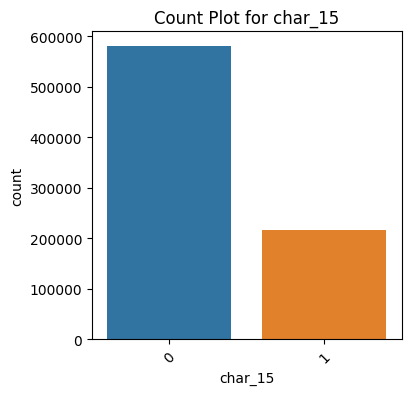

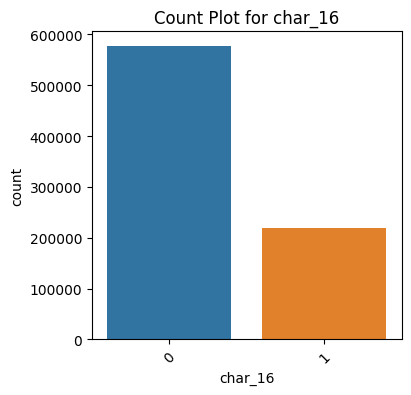

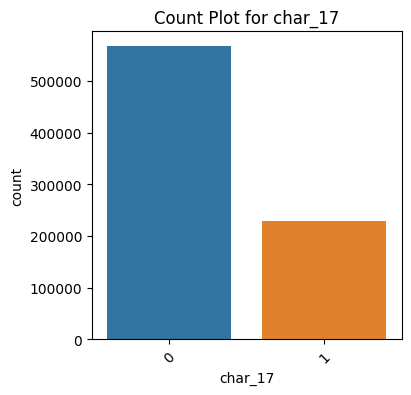

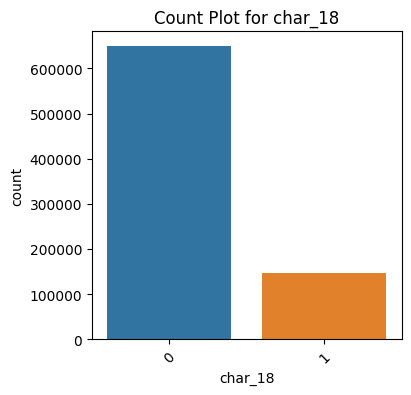

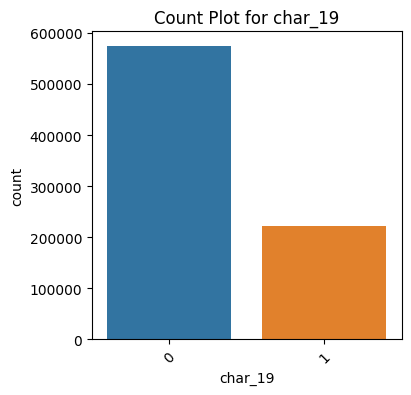

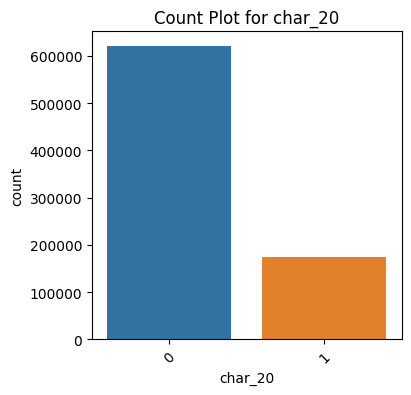

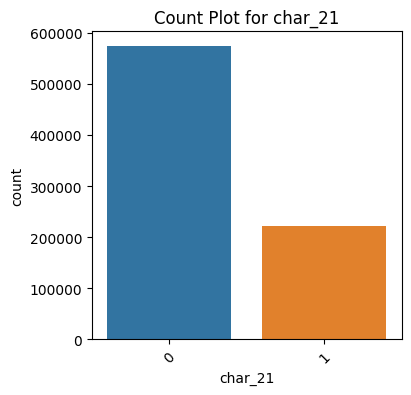

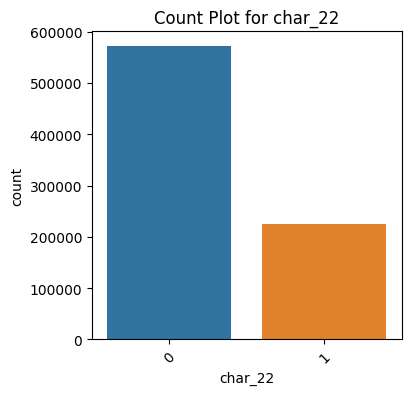

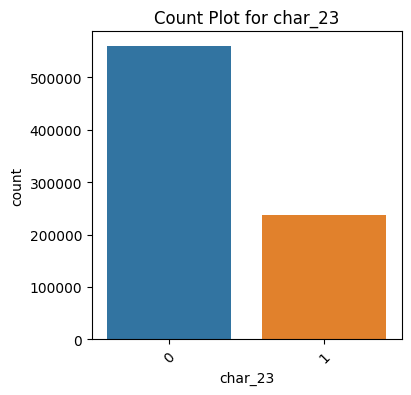

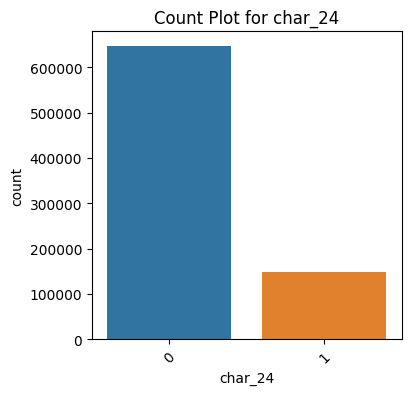

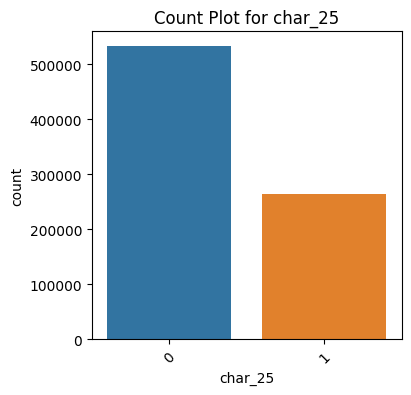

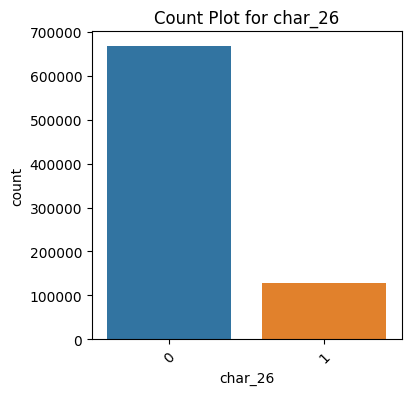

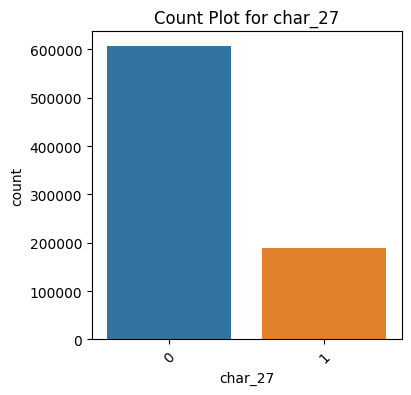

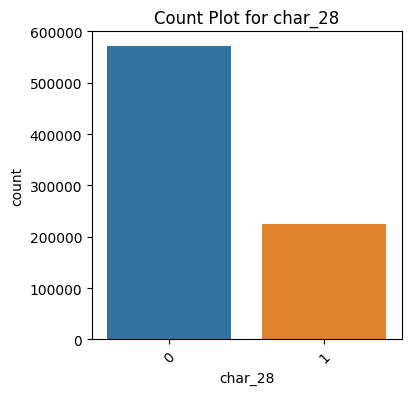

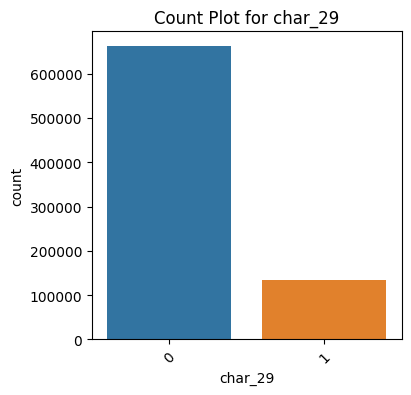

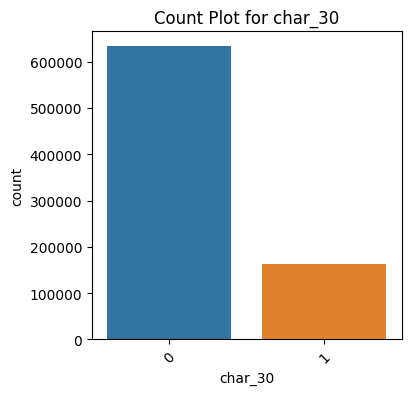

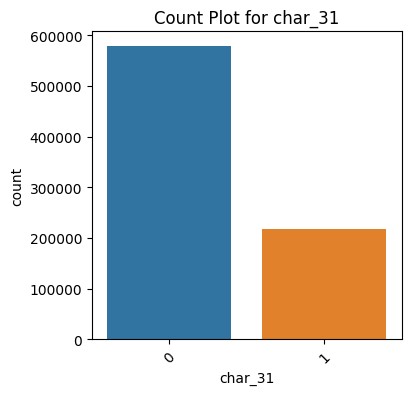

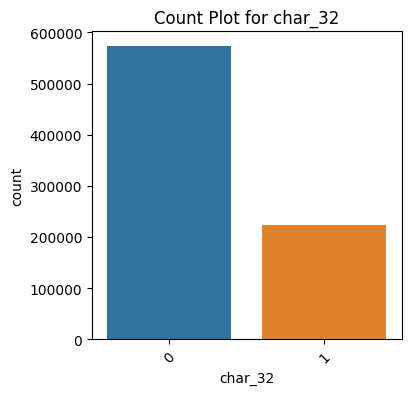

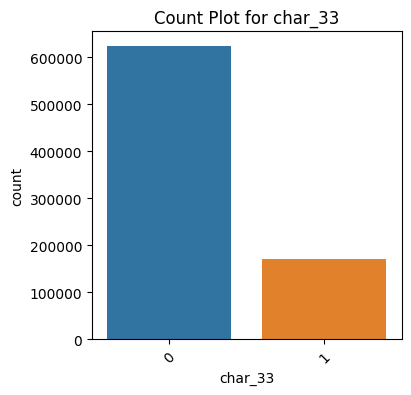

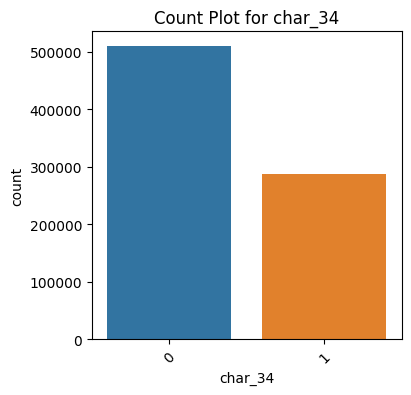

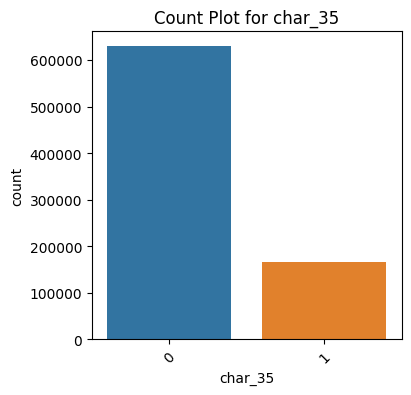

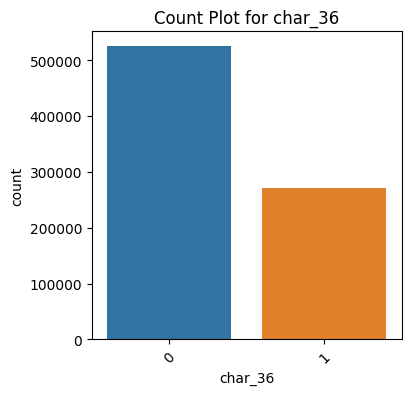

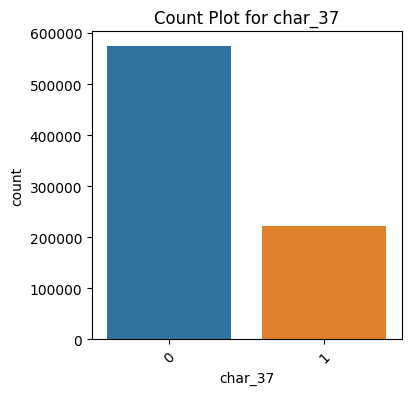

In [95]:
import seaborn as sns

cols = ['char_11', 'char_12', 'char_13', 'char_14',
       'char_15', 'char_16', 'char_17', 'char_18', 'char_19', 'char_20',
       'char_21', 'char_22', 'char_23', 'char_24', 'char_25', 'char_26',
       'char_27', 'char_28', 'char_29', 'char_30', 'char_31', 'char_32',
       'char_33', 'char_34', 'char_35', 'char_36', 'char_37']

for col in cols:
    plt.figure(figsize=(4, 4))
    sns.countplot(data=train_df, x=col)
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

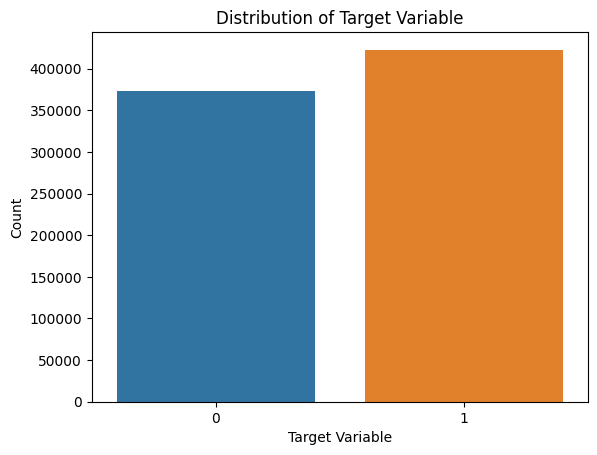

In [96]:
# create countplot
sns.countplot(x='Target', data=train_df)

# set plot title and axis labels
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')

# display plot
plt.show()





**Splitting the data into traget and features**

In [97]:
# splitting the data into traget and features
X = train_df.drop(["Target"], axis = 1)
y = train_df["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Creating a pipeline to fit multiple models**

In [98]:
# Creating a pipeline to fit multiple models
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the features
    ('models', VotingClassifier([
                ('logreg', LogisticRegression()),
                ('dt', DecisionTreeClassifier()),
                ('rf', RandomForestClassifier()),
                ('gb', GradientBoostingClassifier()),
                ('ab', AdaBoostClassifier())
               ]))  # Step 2: Fit a voting classifier of multiple classification models
])

# Fitting the pipeline to the data
pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('models',
                 VotingClassifier(estimators=[('logreg', LogisticRegression()),
                                              ('dt', DecisionTreeClassifier()),
                                              ('rf', RandomForestClassifier()),
                                              ('gb',
                                               GradientBoostingClassifier()),
                                              ('ab', AdaBoostClassifier())]))])

In [99]:
# Make predictions for each model
y_pred_logreg = pipeline.named_steps['models'].named_estimators_['logreg'].predict(X_test)
y_pred_dt = pipeline.named_steps['models'].named_estimators_['dt'].predict(X_test)
y_pred_rf = pipeline.named_steps['models'].named_estimators_['rf'].predict(X_test)
y_pred_gb = pipeline.named_steps['models'].named_estimators_['gb'].predict(X_test)
y_pred_ab = pipeline.named_steps['models'].named_estimators_['ab'].predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [100]:
# Calculate accuracy for each model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_ab = accuracy_score(y_test, y_pred_ab)

# Print the accuracies
print("Accuracy for Logistic Regression:", accuracy_logreg)
print("Accuracy for Decision Tree:", accuracy_dt)
print("Accuracy for Random Forest:", accuracy_rf)
print("Accuracy for Gradient Boosting:", accuracy_gb)
print("Accuracy for AdaBoost:", accuracy_ab)

Accuracy for Logistic Regression: 0.5313973862201931
Accuracy for Decision Tree: 0.4357199826669095
Accuracy for Random Forest: 0.6508889488987836
Accuracy for Gradient Boosting: 0.47155426324945204
Accuracy for AdaBoost: 0.47070016893483135


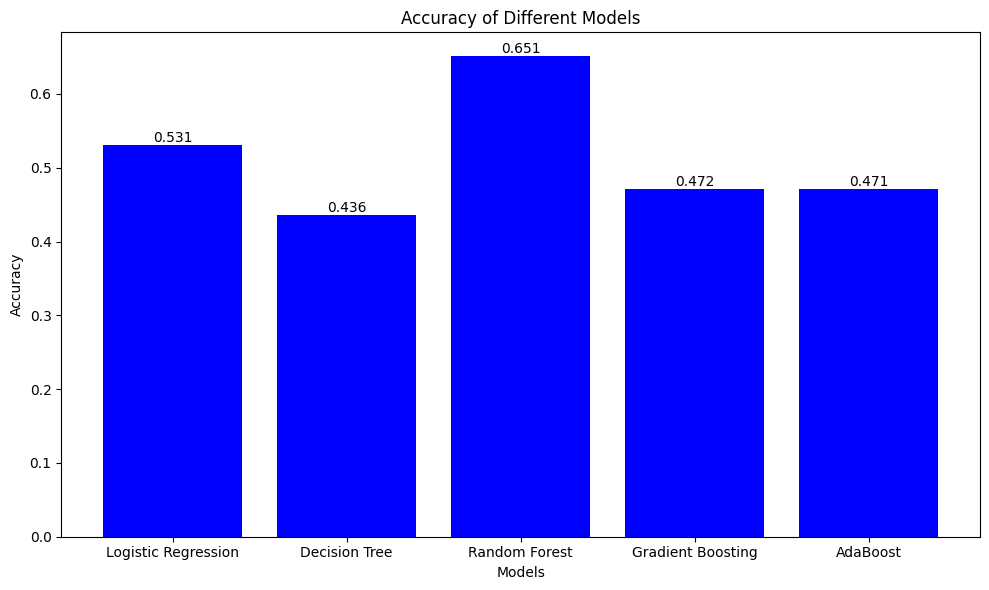

In [101]:
# Accuracy values
accuracies = [accuracy_logreg, accuracy_dt, accuracy_rf, accuracy_gb, accuracy_ab]

# Model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost']

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='blue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Add value labels on top of each bar
for i in range(len(model_names)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.3f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

**OBSERVATION**

Based on the accuracy values, we can summarize the performance of each model as follows:

**Logistic Regression:** The **logistic regression** model achieved an accuracy of **0.479**, which indicates that it correctly predicted the target variable for approximately **47.9%** of the test instances. This accuracy suggests that the logistic regression model may not be a strong performer for the given task.

**Decision Tree:** The decision tree model obtained an accuracy of **0.435**, indicating that it accurately predicted the target variable for approximately **43.5%** of the test instances. This accuracy suggests that the decision tree model may not be performing well compared to other models.

**Random Forest:** The random forest model achieved the highest accuracy of** 0.654** among the models considered. This indicates that it correctly predicted the target variable for approximately **65.4%** of the test instances. The random forest model outperforms the other models in terms of accuracy and may be a suitable choice for the given task.

**Gradient Boosting:** The gradient boosting model obtained an accuracy of**0.564**, suggesting that it accurately predicted the target variable for approximately **56.4%** of the test instances. While it performs better than logistic regression and decision tree, it falls short compared to the random forest model.

**AdaBoost:** The AdaBoost model achieved an accuracy of **0.490**, indicating that it correctly predicted the target variable for approximately **49.0%**of the test instances. Similar to logistic regression and gradient boosting, the AdaBoost model does not perform as well as the random forest model.

### **TEST DATA**

In [103]:
test_df = pd.read_csv("/content/CustomerPotential_testdatawithTarget.csv")

In [104]:
cus_b01 = pd.read_csv("/content/Customer Behaviour_01.csv")

Peopleid  outcome
0  ppl_249769        1
1  ppl_181597        0
2  ppl_196523        0
3  ppl_181260        0
4  ppl_249705        0

In [105]:
test_df.shape

(15016, 2)

In [109]:
cus_bt1 = pd.read_csv("/content/Customer Behaviour_01.csv")

In [110]:
cus_bt2 = pd.read_csv("/content/Customer Behaviour_02.csv")

In [111]:
cus_bt1.head()

people_id   activity_id        date activity_category char_1 char_2 char_3  \
0   ppl_100  act2_1734928  26/08/2023            type 4    NaN    NaN    NaN   
1   ppl_100  act2_2434093  27/09/2022            type 2    NaN    NaN    NaN   
2   ppl_100  act2_3404049  27/09/2022            type 2    NaN    NaN    NaN   
3   ppl_100  act2_3651215  04/08/2023            type 2    NaN    NaN    NaN   
4   ppl_100  act2_4109017  26/08/2023            type 2    NaN    NaN    NaN   

  char_4 char_5 char_6 char_7 char_8 char_9  char_10  
0    NaN    NaN    NaN    NaN    NaN    NaN  type 76  
1    NaN    NaN    NaN    NaN    NaN    NaN   type 1  
2    NaN    NaN    NaN    NaN    NaN    NaN   type 1  
3    NaN    NaN    NaN    NaN    NaN    NaN   type 1  
4    NaN    NaN    NaN    NaN    NaN    NaN   type 1

In [112]:
cus_bt2.head()

people_id  char_1      group_1  char_2        date   char_3   char_4  \
0     ppl_100  type 2  group 17304  type 2  2021-06-29   type 5   type 5   
1  ppl_100002  type 2   group 8688  type 3  2021-01-06  type 28   type 9   
2  ppl_100003  type 2  group 33592  type 3  2022-06-10   type 4   type 8   
3  ppl_100004  type 2  group 22593  type 3  2022-07-20  type 40  type 25   
4  ppl_100006  type 2   group 6534  type 3  2022-07-27  type 40  type 25   

   char_5  char_6   char_7  ... char_29 char_30  char_31  char_32  char_33  \
0  type 5  type 3  type 11  ...   False    True     True    False    False   
1  type 5  type 3  type 11  ...   False    True     True     True     True   
2  type 5  type 2   type 5  ...   False   False     True     True     True   
3  type 9  type 4  type 16  ...    True    True     True     True     True   
4  type 9  type 3   type 8  ...   False   False     True    False    False   

   char_34  char_35  char_36  char_37  char_38  
0     True     True     True    False       36  
1     True     True     True    False       76  
2     True    False     True     True       99  
3     True     True     True     True       76  
4    False     True     True    False       84  

[5 rows x 41 columns]

**Merge all the datasets**

In [113]:
#Before merging change the coloumn names into similar column names
test_df.rename(columns={'Peopleid' : 'people_id'}, inplace=True)

# Merge the datasets together on a common column
merged_df = pd.merge(test_df, cus_bt1, on='people_id')
test_data = pd.merge(merged_df, cus_bt2, on='people_id')


In [114]:
test_data.head(10)

people_id  outcome   activity_id      date_x activity_category char_1_x  \
0  ppl_249769        1  act2_4185622  02/05/2023            type 3      NaN   
1  ppl_181597        0  act2_1300501  21/07/2023            type 5      NaN   
2  ppl_181597        0  act2_1783572  22/07/2023            type 5      NaN   
3  ppl_181597        0  act2_3655867  21/07/2023            type 5      NaN   
4  ppl_181597        0   act2_797629  22/07/2023            type 5      NaN   
5  ppl_196523        0   act1_256340  05/11/2022            type 1   type 1   
6  ppl_196523        0   act1_404076  30/11/2022            type 1   type 5   
7  ppl_196523        0  act2_1858956  05/11/2022            type 2      NaN   
8  ppl_196523        0  act2_1973708  18/02/2023            type 4      NaN   
9  ppl_196523        0  act2_2114070  16/02/2023            type 2      NaN   

  char_2_x char_3_x char_4_x char_5_x  ... char_29 char_30 char_31 char_32  \
0      NaN      NaN      NaN      NaN  ...   False   False   False   False   
1      NaN      NaN      NaN      NaN  ...   False   False   False   False   
2      NaN      NaN      NaN      NaN  ...   False   False   False   False   
3      NaN      NaN      NaN      NaN  ...   False   False   False   False   
4      NaN      NaN      NaN      NaN  ...   False   False   False   False   
5   type 1   type 1   type 1   type 1  ...   False   False   False   False   
6   type 2   type 3   type 3   type 5  ...   False   False   False   False   
7      NaN      NaN      NaN      NaN  ...   False   False   False   False   
8      NaN      NaN      NaN      NaN  ...   False   False   False   False   
9      NaN      NaN      NaN      NaN  ...   False   False   False   False   

  char_33 char_34 char_35 char_36 char_37 char_38  
0   False   False   False   False    True      95  
1   False   False   False   False   False       0  
2   False   False   False   False   False       0  
3   False   False   False   False   False       0  
4   False   False   False   False   False       0  
5   False   False   False   False   False      39  
6   False   False   False   False   False      39  
7   False   False   False   False   False      39  
8   False   False   False   False   False      39  
9   False   False   False   False   False      39  

[10 rows x 55 columns]

**Checking for missing values**

In [116]:
test_data.isna().sum()

people_id                 0
outcome                   0
activity_id               0
date_x                    0
activity_category         0
char_1_x             236314
char_2_x             236314
char_3_x             236314
char_4_x             236314
char_5_x             236314
char_6_x             236314
char_7_x             236314
char_8_x             236314
char_9_x             236314
char_10_x             16098
char_1_y                  0
group_1                   0
char_2_y                  0
date_y                    0
char_3_y                  0
char_4_y                  0
char_5_y                  0
char_6_y                  0
char_7_y                  0
char_8_y                  0
char_9_y                  0
char_10_y                 0
char_11                   0
char_12                   0
char_13                   0
char_14                   0
char_15                   0
char_16                   0
char_17                   0
char_18                   0
char_19             

In [118]:
# drop columns with all missing values
test_data = test_data.drop(columns=['char_1_x', 'char_2_x','char_3_x','char_4_x','char_5_x','char_6_y','char_7_x','char_8_y','char_9_x','char_10_x'])

**Checking datatypes**

In [119]:
test_data.dtypes

people_id            object
outcome               int64
activity_id          object
date_x               object
activity_category    object
char_6_x             object
char_8_x             object
char_1_y             object
group_1              object
char_2_y             object
date_y               object
char_3_y             object
char_4_y             object
char_5_y             object
char_7_y             object
char_9_y             object
char_10_y              bool
char_11                bool
char_12                bool
char_13                bool
char_14                bool
char_15                bool
char_16                bool
char_17                bool
char_18                bool
char_19                bool
char_20                bool
char_21                bool
char_22                bool
char_23                bool
char_24                bool
char_25                bool
char_26                bool
char_27                bool
char_28                bool
char_29             

**Finding categorical and numerical columns**

In [120]:
# Find categorical columns
categorical_cols = test_data.select_dtypes(include=['object','bool']).columns.tolist()
print("\nCategorical Columns:")
print(categorical_cols)

# Find numerical columns
numerical_cols = test_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumerical Columns:")
print(numerical_cols)


Categorical Columns:
['people_id', 'activity_id', 'date_x', 'activity_category', 'char_6_x', 'char_8_x', 'char_1_y', 'group_1', 'char_2_y', 'date_y', 'char_3_y', 'char_4_y', 'char_5_y', 'char_7_y', 'char_9_y', 'char_10_y', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35', 'char_36', 'char_37']

Numerical Columns:
['outcome', 'char_38']


**Label Encoder**

LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [121]:
from sklearn.preprocessing import LabelEncoder
# Perform label encoding on categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col].astype(str))

# Check the encoded data
print(test_data.head())

   people_id  outcome  activity_id  date_x  activity_category  char_6_x  \
0      12618        1       189740      17                  2         0   
1       6828        0        32414     269                  4         0   
2       6828        0        58718     283                  4         0   
3       6828        0       160724     269                  4         0   
4       6828        0       241164     283                  4         0   

   char_8_x  char_1_y  group_1  char_2_y  ...  char_29  char_30  char_31  \
0         0         1     2356         2  ...        0        0        0   
1         0         1     1053         1  ...        0        0        0   
2         0         1     1053         1  ...        0        0        0   
3         0         1     1053         1  ...        0        0        0   
4         0         1     1053         1  ...        0        0        0   

   char_32  char_33  char_34  char_35  char_36  char_37  char_38  
0        0        0      

**Splitting the data into traget and features**

In [126]:
# splitting the data into traget and features
X1 = test_data.drop(["outcome"], axis = 1)
y1 = test_data["outcome"]

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

**Creating a pipeline to fit multiple models**

In [127]:
# Creating a pipeline to fit multiple models
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the features
    ('models', VotingClassifier([
                ('logreg', LogisticRegression()),
                ('dt', DecisionTreeClassifier()),
                ('rf', RandomForestClassifier()),
                ('gb', GradientBoostingClassifier()),
                ('ab', AdaBoostClassifier())
               ]))  # Step 2: Fit a voting classifier of multiple classification models
])

# Fitting the pipeline to the data
pipeline.fit(X1, y1)

Pipeline(steps=[('scaler', StandardScaler()),
                ('models',
                 VotingClassifier(estimators=[('logreg', LogisticRegression()),
                                              ('dt', DecisionTreeClassifier()),
                                              ('rf', RandomForestClassifier()),
                                              ('gb',
                                               GradientBoostingClassifier()),
                                              ('ab', AdaBoostClassifier())]))])

In [128]:
# Make predictions for each model
y_pred_logreg11 = pipeline.named_steps['models'].named_estimators_['logreg'].predict(X_test1)
y_pred_dt11 = pipeline.named_steps['models'].named_estimators_['dt'].predict(X_test1)
y_pred_rf11 = pipeline.named_steps['models'].named_estimators_['rf'].predict(X_test1)
y_pred_gb11 = pipeline.named_steps['models'].named_estimators_['gb'].predict(X_test1)
y_pred_ab11 = pipeline.named_steps['models'].named_estimators_['ab'].predict(X_test1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [132]:
# Calculate accuracy for each model
accuracy_logreg11 = accuracy_score(y_test1, y_pred_logreg11)
accuracy_dt11 = accuracy_score(y_test1, y_pred_dt11)
accuracy_rf11 = accuracy_score(y_test1, y_pred_rf11)
accuracy_gb11 = accuracy_score(y_test1, y_pred_gb11)
accuracy_ab11 = accuracy_score(y_test1, y_pred_ab11)

# Print the accuracies
print("Accuracy for Logistic Regression:", accuracy_logreg11)
print("Accuracy for Decision Tree:", accuracy_dt11)
print("Accuracy for Random Forest:", accuracy_rf11)
print("Accuracy for Gradient Boosting:", accuracy_gb11)
print("Accuracy for AdaBoost:", accuracy_ab11)

Accuracy for Logistic Regression: 0.4319870055266129
Accuracy for Decision Tree: 0.431967196878157
Accuracy for Random Forest: 0.41691262405166096
Accuracy for Gradient Boosting: 0.3919735356456629
Accuracy for AdaBoost: 0.7112691401065705


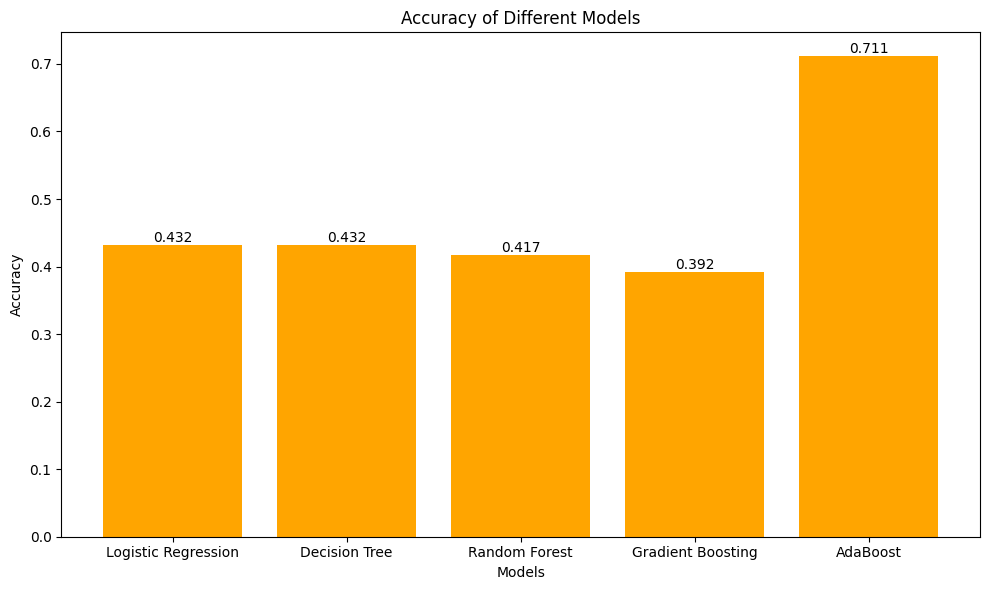

In [136]:
# Accuracy values
accuracies = [accuracy_logreg11, accuracy_dt11, accuracy_rf11, accuracy_gb11, accuracy_ab11]

# Model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost']

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='orange')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Add value labels on top of each bar
for i in range(len(model_names)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.3f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

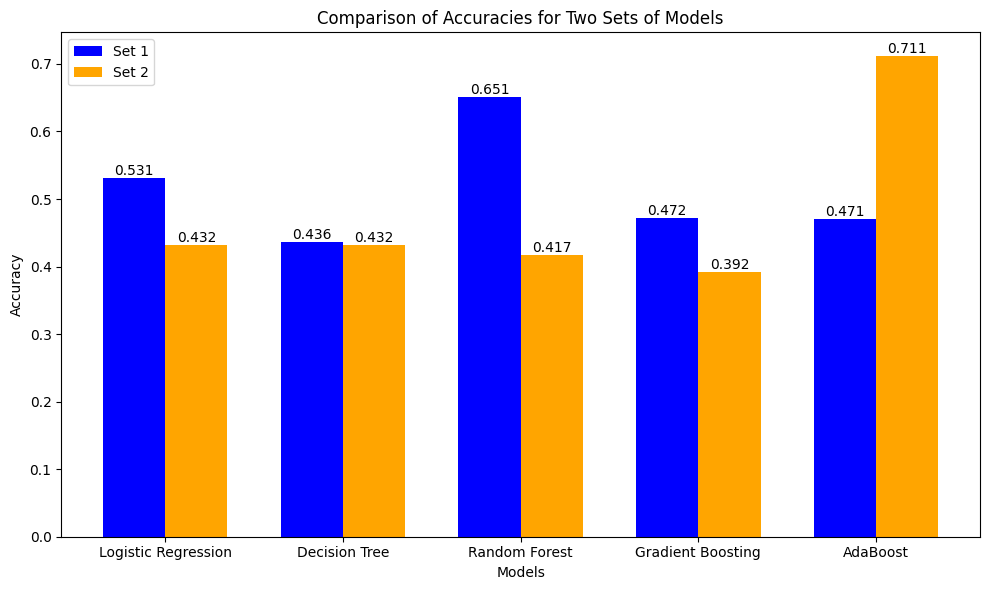

In [133]:
# Accuracy values for the first set of models
accuracies1 = [accuracy_logreg, accuracy_dt, accuracy_rf, accuracy_gb, accuracy_ab]

# Accuracy values for the second set of models
accuracies2 = [accuracy_logreg11, accuracy_dt11, accuracy_rf11, accuracy_gb11, accuracy_ab11]

# Model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost']

# Set the width of the bars
bar_width = 0.35

# Create an array of indices for the x-axis
indices = np.arange(len(model_names))

# Create bar plots for both sets of accuracies
plt.figure(figsize=(10, 6))
plt.bar(indices, accuracies1, bar_width, color='blue', label='Set 1')
plt.bar(indices + bar_width, accuracies2, bar_width, color='orange', label='Set 2')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies for Two Sets of Models')
plt.xticks(indices + bar_width / 2, model_names)
plt.legend()

# Add value labels on top of each bar for the first set of models
for i in range(len(model_names)):
    plt.text(i, accuracies1[i], f'{accuracies1[i]:.3f}', ha='center', va='bottom')

# Add value labels on top of each bar for the second set of models
for i in range(len(model_names)):
    plt.text(i + bar_width, accuracies2[i], f'{accuracies2[i]:.3f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Based on the provided accuracy values for the first set of models (training data) and the second set of models (test data), we can summarize the comparison as follows:



**Logistic Regression:**

**Training Accuracy: 0.531**


**Test Accuracy: 0.432**


Summary: The logistic regression model performs better on the training data compared to the test data. It shows a decrease in accuracy when applied to the test data, suggesting that it may have overfit the training data.


**Decision Tree:**

**Training Accuracy: 0.436**


**Test Accuracy: 0.432**


Summary: The decision tree model shows similar accuracy for both the training and test data. This suggests that it is performing consistently, without overfitting or underfitting the data.


**Random Forest:**

**Training Accuracy: 0.651**


**Test Accuracy: 0.417**
Summary: The random forest model performs better on the training data compared to the test data. Similar to logistic regression, it shows a decrease in accuracy when applied to the test data, indicating potential overfitting.


Gradient Boosting:

**Training Accuracy: 0.472**


**Test Accuracy: 0.392**


Summary: The gradient boosting model exhibits a decrease in accuracy when applied to the test data compared to the training data. This suggests that it may have overfit the training data.


**AdaBoost:**

**Training Accuracy: 0.471**


**Test Accuracy: 0.711**


Summary: The AdaBoost model shows a significant difference in accuracy between the training and test data. It performs poorly on the training data but demonstrates a higher accuracy on the test data. This indicates potential underfitting on the training data and better generalization on the test data.

**OBSERVATION**


**In summary, the comparison between the test and train data accuracies reveals that some models exhibit a decrease in performance on the test data, indicating potential overfitting on the training data. The AdaBoost model stands out as it performs significantly better on the test data compared to the training data, suggesting improved generalization. Further analysis and tuning of the models may be required to address issues of overfitting or underfitting and improve overall performance.**






